# erddapy: a python client/URL builder for ERDDAP

ERDDAP has RESTful API that is very convenient for creating web apps, data portals, etc. However, writing those URLs manually can be tedious and error prone

This notebook walks through an easy to set up ERDDAP RESTful URL by using the python client, `erddapy`.

A typical ERDDAP RESTful URL looks like:

[https://data.ioos.us/gliders/erddap/tabledap/whoi_406-20160902T1700.mat?depth,latitude,longitude,salinity,temperature,time&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z &latitude>=38.0&latitude<=41.0&longitude>=-72.0&longitude<=-69.0](https://data.ioos.us/gliders/erddap/tabledap/whoi_406-20160902T1700.mat?depth,latitude,longitude,salinity,temperature,time&time>=2016-07-10T00:00:00Z&time<=2017-02-10T00:00:00Z&latitude>=38.0&latitude<=41.0&longitude>=-72.0&longitude<=-69.0)

Let's break it down to smaller parts:

- **server**: https://data.ioos.us/gliders/erddap/
- **protocol**: tabledap
- **dataset_id**: whoi_406-20160902T1700
- **response**: .mat
- **variables**: depth,latitude,longitude,temperature,time
- **constraints**:
    - time>=2016-07-10T00:00:00Z
    - time<=2017-02-10T00:00:00Z
    - latitude>=38.0
    - latitude<=41.0
    - longitude>=-72.0
    - longitude<=-69.0

### Emilio's notes, 7/24
- The original notebook from the IOOS gallery is at http://ioos.github.io/notebooks_demos/notebooks/2018-03-01-erddapy/
- A newer version of the notebook is presented at https://pyoceans.github.io/erddapy/quick_intro.html, and even newer at this gist Filipe created on 7/23: http://nbviewer.jupyter.org/gist/ocefpaf/2e45fe0bdd0320496aa3b7f98f07a4d9
- The code below reflects these updates and fixes
- Ask Filipe about why there are two types (parameters) of lat-lon and temporal constraints
- Ask Filipe about the initial dataset search with "min" parameters, how that reflects a "within" vs "contains" query vis a vis CSW queries

## Preamble

In [1]:
import pandas as pd
import geopandas as gpd

from erddapy import ERDDAP

In [2]:
server = 'https://data.ioos.us/gliders/erddap'
protocol = 'tabledap'

In [3]:
# OOI Endurance Array (PNW) region
min_lon, max_lon = -127, -123.75
min_lat, max_lat = 43, 48

Feeding these variables in the `erddapy.ERDDAP` class we will create the URL builder object.

## 1. Search ERDDAP "catalog"

In [4]:
e = ERDDAP(server=server, protocol=protocol)

In [5]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='all'))
len(df)

445

We can refine our search by adding some constraints.

In [6]:
min_time = '2015-01-01T00:00:00Z'
max_time = '2016-12-31T00:00:00Z'

# why is it using these min/max parameter names, instead of the parameter (key) names that include >, >=, etc??
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': min_lon,
    'max_lon': max_lon,
    'min_lat': min_lat,
    'max_lat': max_lat,
    'min_time': min_time,
    'max_time': max_time,
    'cdm_data_type': 'trajectoryprofile' #is this actually helpful here, or clutter?
}

In [7]:
search_url = e.get_search_url(response='csv', **kw)
search = pd.read_csv(search_url)
gliders = search['Dataset ID'].values

msg = 'Found {} Glider Datasets:\n\n{}'.format
print(msg(len(gliders), '\n'.join(gliders)))

Found 30 Glider Datasets:

allnanoos-uwGliders
ce_247-20160510T0242
ce_247-20160928T2157
ce_311-20160122T2045
ce_311-20161011T2101
ce_312-20160122T2140
ce_312-20160920T1743
ce_319-20151008T2255
ce_319-20160616T1912
ce_320-20160616T2004
ce_326-20150410T1942
ce_326-20151015T1908
ce_326-20160217T1655
ce_327-20150603T0000
ce_327-20151015T1701
ce_327-20160923T0147
ce_327-20161215T2058
ce_382-20150121T2202
ce_382-20160928T2102
ce_383-20150121T2028
ce_383-20150813T2109
ce_384-20150411T1807
ce_384-20160507T1655
ce_386-20150404T1729
ce_386-20151015T2247
ce_386-20160922T2355
ce_386-20161215T1736
SG187-20140625T1330
SG187-20150616T1034
UW157-20141116T2118


In [8]:
search.Institution.value_counts()

Ocean Observatories Initiative                                                                                               26
Applied Physics Lab\nUniversity of Washington\nSeattle, WA                                                                    3
Oregon State University\nCollege of Earth, Ocean and Atmospheric Sciences\n104 CEOAS Admin Bldg\nCorvallis, OR 97331-5503     1
Name: Institution, dtype: int64

In [9]:
search.head()

,griddap,Subset,tabledap,Make A Graph,wms,files,Title,Summary,FGDC,ISO 19115,Info,Background Info,RSS,Email,Institution,Dataset ID
0,NaN,https://data.ioos.us/gliders/erddap/tabledap/a...,https://data.ioos.us/gliders/erddap/tabledap/a...,https://data.ioos.us/gliders/erddap/tabledap/a...,NaN,NaN,All nanoos-uw Gliders,"Seaglider La Push NANOOS line, Washington. Gli...",https://data.ioos.us/gliders/erddap/metadata/f...,https://data.ioos.us/gliders/erddap/metadata/i...,https://data.ioos.us/gliders/erddap/info/allna...,http://data.ioos.us/gliders/erddap/,https://data.ioos.us/gliders/erddap/rss/allnan...,https://data.ioos.us/gliders/erddap/subscripti...,Applied Physics Lab\nUniversity of Washington\...,allnanoos-uwGliders
1,NaN,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,NaN,NaN,ce_247-20160510T0242,The Endurance Array is a multi-scaled array ut...,https://data.ioos.us/gliders/erddap/metadata/f...,https://data.ioos.us/gliders/erddap/metadata/i...,https://data.ioos.us/gliders/erddap/info/ce_24...,http://data.ioos.us/gliders/erddap/,https://data.ioos.us/gliders/erddap/rss/ce_247...,https://data.ioos.us/gliders/erddap/subscripti...,Ocean Observatories Initiative,ce_247-20160510T0242
2,NaN,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,NaN,NaN,ce_247-20160928T2157,The Endurance Array is a multi-scaled array ut...,https://data.ioos.us/gliders/erddap/metadata/f...,https://data.ioos.us/gliders/erddap/metadata/i...,https://data.ioos.us/gliders/erddap/info/ce_24...,http://data.ioos.us/gliders/erddap/,https://data.ioos.us/gliders/erddap/rss/ce_247...,https://data.ioos.us/gliders/erddap/subscripti...,Ocean Observatories Initiative,ce_247-20160928T2157
3,NaN,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,NaN,NaN,ce_311-20160122T2045,The Endurance Array is a multi-scaled array ut...,https://data.ioos.us/gliders/erddap/metadata/f...,https://data.ioos.us/gliders/erddap/metadata/i...,https://data.ioos.us/gliders/erddap/info/ce_31...,http://data.ioos.us/gliders/erddap/,https://data.ioos.us/gliders/erddap/rss/ce_311...,https://data.ioos.us/gliders/erddap/subscripti...,Ocean Observatories Initiative,ce_311-20160122T2045
4,NaN,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,https://data.ioos.us/gliders/erddap/tabledap/c...,NaN,NaN,ce_311-20161011T2101,The Endurance Array is a multi-scaled array ut...,https://data.ioos.us/gliders/erddap/metadata/f...,https://data.ioos.us/gliders/erddap/metadata/i...,https://data.ioos.us/gliders/erddap/info/ce_31...,http://data.ioos.us/gliders/erddap/,https://data.ioos.us/gliders/erddap/rss/ce_311...,https://data.ioos.us/gliders/erddap/subscripti...,Ocean Observatories Initiative,ce_311-20161011T2101


**Should filter out records starting with "all" (eg, allnanoos-uwGliders). They'll add redundant requests and heft!!**

Last but not least we can inspect a specific `dataset_id`.

In [10]:
dataset_id = 'ce_327-20160923T0147'

In [11]:
# print(gliders[0])

info_url = e.get_info_url(dataset_id=dataset_id, response='csv')
info = pd.read_csv(info_url)

In [12]:
info.head(20)

,Row Type,Variable Name,Attribute Name,Data Type,Value
0,attribute,NC_GLOBAL,acknowledgment,String,Funding provided by the National Science Found...
1,attribute,NC_GLOBAL,cdm_data_type,String,TrajectoryProfile
2,attribute,NC_GLOBAL,cdm_profile_variables,String,"profile_id, time, latitude, longitude, time_uv..."
3,attribute,NC_GLOBAL,cdm_trajectory_variables,String,"trajectory, wmo_id"
4,attribute,NC_GLOBAL,contributor_name,String,"Ed Dever,Jon Fram,Stuart Pearce,John Kerfoot"
5,attribute,NC_GLOBAL,contributor_role,String,"Endurance Array Program Manager,Endurance Arra..."
6,attribute,NC_GLOBAL,Conventions,String,"Unidata Dataset Discovery v1.0, COARDS, CF-1.6"
7,attribute,NC_GLOBAL,creator_email,String,kerfoot@marine.rutgers.edu
8,attribute,NC_GLOBAL,creator_name,String,John Kerfoot
9,attribute,NC_GLOBAL,creator_url,String,http://www.whoi.edu/ooi_cgsn/home


With the info URL we can filter the data using attributes.

In [13]:
cdm_profile_variables = info.loc[
    info['Attribute Name'] == 'cdm_profile_variables', 'Variable Name'
]

print(''.join(cdm_profile_variables))

NC_GLOBAL


In fact, that is such a common operation that `erddapy` brings its own method for filtering data by attributes. In the next three cells we request the variables names that has a `cdm_profile_variables`, a `standard_name` of `sea_water_temperature`, and an axis respectively.

In [14]:
e.get_var_by_attr(
    dataset_id=dataset_id,
    cdm_profile_variables=lambda v: v is not None,
)

['NC_GLOBAL']

In [15]:
# e.get_var_by_attr(
#     dataset_id='whoi_406-20160902T1700',
#     standard_name='sea_water_temperature',
# )

In [16]:
e.get_var_by_attr(
    dataset_id=dataset_id,
    axis=lambda v: v in ['X', 'Y', 'Z', 'T'],
)

['time',
 'precise_lat',
 'precise_time',
 'pressure',
 'depth',
 'longitude',
 'latitude',
 'precise_lon']

## 2. Investigate one glider dataset, picked manually

NOTE: setting a dataset_id filter makes the time and spatial filters mostly redundant. I've removed the spatial constraints, and can probably remove the temporal ones too.
   
Reuse `e`

In [17]:
dataset_id = 'ce_327-20160923T0147'

variables = [
 'depth',
 'latitude',
 'longitude',
 'salinity',
 'temperature',
 'time',
]

# constraints = {
#     'time>=': '2016-07-10T00:00:00Z',
#     'time<=': '2017-02-10T00:00:00Z',
# }

# East Coast / Mid Atlantic Bight
#     'latitude>=': 38.0,
#     'latitude<=': 41.0,
#     'longitude>=': -72.0,
#     'longitude<=': -69.0,

In [18]:
e.dataset_id = dataset_id
# e.constraints = constraints
e.variables = variables

url = e.get_download_url(response = 'mat')

print(url)

https://data.ioos.us/gliders/erddap/tabledap/ce_327-20160923T0147.mat?depth,latitude,longitude,salinity,temperature,time


If we change the response to `html` we can visualize the page.

Additionally, the object has `.get_info_url()` and `.get_search_url()` that can be used to obtain the info and search URLs respectively

`erddapy` also brings some simple methods to download the data in some common data formats, like `pandas.DataFrame` and `xarray.Dataset`.

In [19]:
# HMM if response='mat', why is skiprows=(1,) needed? That's for csv!
df = e.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,depth,latitude,longitude,salinity,temperature
time,,,,,
2016-09-23 02:53:59,6.029532,46.844764,-124.970629,32.036080,16.1662
2016-09-23 02:53:59,17.721159,46.844764,-124.970629,32.065550,15.8635
2016-09-23 02:53:59,29.084904,46.844764,-124.970629,32.625830,12.2676
2016-09-23 02:53:59,39.337505,46.844764,-124.970629,32.647892,10.8881
2016-09-23 02:53:59,49.123608,46.844764,-124.970629,32.663166,10.1780


In [20]:
ds = e.to_xarray(decode_times=False)

ds['temperature']

<xarray.DataArray 'temperature' (row: 18694)>
array([16.1662, 15.8635, 12.2676, ..., 12.1134, 11.623 , 10.498 ],
      dtype=float32)
Coordinates:
    depth      (row) float32 ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    time       (row) float64 ...
Dimensions without coordinates: row
Attributes:
    _ChunkSizes:          1
    actual_range:         [ 0.     17.3803]
    ancillary_variables:  temperature_qc
    colorBarMaximum:      32.0
    colorBarMinimum:      0.0
    instrument:           instrument_ctd
    ioos_category:        Temperature
    long_name:            Sea Water Temperature
    observation_type:     measured
    platform:             platform
    source_variable:      sci_water_temp
    standard_name:        sea_water_temperature
    units:                degree_Celsius
    valid_max:            40.0
    valid_min:            -5.0

Here is a simple plot using the data from `xarray`.

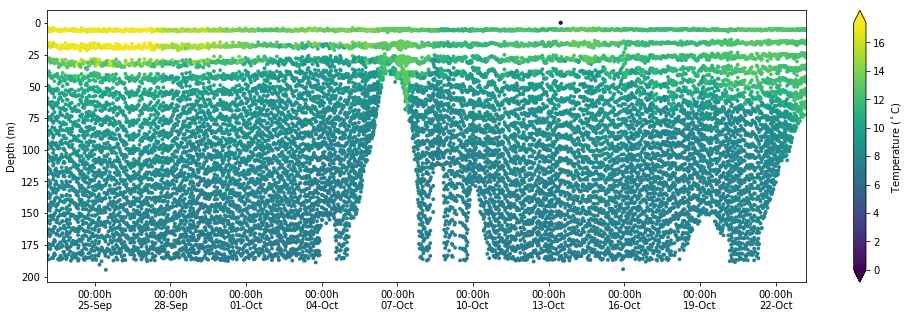

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize=(17, 5))
kw = dict(s=15, c=df['temperature'], marker='o', edgecolor='none')
cs = ax.scatter(df.index, df['depth'], **kw)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

One can build the proper variables programmatically, feed them in erddapy, and then build a service like [this notebook](https://mybinder.org/v2/gh/ioos/BioData-Training-Workshop/master?filepath=notebooks/ERDDAP_timeseries_explorer-IOOS.ipynb). However, erddapy is also designed for interactive work. One can explore interactively the ERDDAP server from Python.

PS: Note that in this example below we did not feed any variables other than the server URL

## 3. Query and plot on Folium map all track points

### Query, download and process the glider track data

In [22]:
e = ERDDAP(server=server, protocol=protocol)

In [23]:
variables = [
 'latitude',
 'longitude',
]

constraints = {
    'time>=': min_time,
    'time<=': max_time,
}

In [24]:
from requests.exceptions import HTTPError

tracks_df_lst = []
for glider in gliders:
    try:
        download_url = e.get_download_url(
            protocol='tabledap',
            response='csv',
            dataset_id=glider,
            variables=variables,
            
            constraints=constraints
        )
        # Add a "distinct" constraint, to reduce the amount of data that's downloaded
        # (have the Glider DAC server do the work)
        download_url += '&distinct()'  # should try to url encode .. AND ASK FILIPE IF THERE'S A MORE NATIVE WAY OF DOING THIS
    except HTTPError:
        continue
    
    track_df = pd.read_csv(download_url, skiprows=[1])
    track_df['glider'] = glider
    tracks_df_lst.append(track_df)

**Create a Geopandas GDF out of the data that was downloaded. A GeoDataFrame can be leveraged for more convenient exploration.**

In [25]:
from shapely.geometry import Point

tracks_df = pd.concat(tracks_df_lst)
tracks_df.dropna(axis='index', how='any', inplace=True)
#tracks_df.reset_index(inplace=True, drop=True)
tracks_gdf = gpd.GeoDataFrame(tracks_df,
                              geometry=tracks_df[['longitude', 'latitude']].apply(Point, axis=1))

In [26]:
tracks_gdf.head()

,latitude,longitude,glider,geometry
0,46.980409,-126.902202,allnanoos-uwGliders,POINT (-126.9022016933133 46.9804089333712)
1,46.980674,-126.981841,allnanoos-uwGliders,POINT (-126.9818414547722 46.98067412460817)
2,46.982353,-126.958219,allnanoos-uwGliders,POINT (-126.9582188120057 46.98235282991696)
3,46.984166,-126.938601,allnanoos-uwGliders,POINT (-126.9386012951809 46.98416576819778)
4,46.985306,-126.924194,allnanoos-uwGliders,POINT (-126.9241940752299 46.98530630851414)


In [27]:
tracks_gdf.glider.value_counts()

ce_383-20150813T2109    5492
ce_326-20150410T1942    5171
ce_382-20150121T2202    5077
ce_327-20150603T0000    4596
ce_247-20160928T2157    4033
ce_327-20151015T1701    2938
ce_311-20161011T2101    2657
ce_311-20160122T2045    2521
ce_326-20151015T1908    2279
ce_386-20160922T2355    2097
ce_326-20160217T1655    1870
allnanoos-uwGliders     1821
ce_247-20160510T0242    1761
SG187-20150616T1034     1558
ce_319-20151008T2255    1432
ce_327-20160923T0147    1274
ce_386-20161215T1736    1214
ce_320-20160616T2004    1141
ce_386-20151015T2247    1129
ce_382-20160928T2102    1038
ce_312-20160920T1743     985
ce_386-20150404T1729     933
ce_384-20150411T1807     882
ce_384-20160507T1655     836
ce_383-20150121T2028     664
ce_327-20161215T2058     571
ce_312-20160122T2140     527
UW157-20141116T2118      343
ce_319-20160616T1912     327
SG187-20140625T1330      263
Name: glider, dtype: int64

Remove the allnanoos-uwGliders dataset, because it's redundant.

In [28]:
glider_alldup = [glider for glider in tracks_gdf.glider.unique() if glider.startswith('all')]
glider_alldup

['allnanoos-uwGliders']

In [29]:
tracks_gdf = tracks_gdf[~tracks_gdf.glider.isin(glider_alldup)].copy()

### Let's plot the tracks for all the gliders found in that search.

In [30]:
from palettable import cubehelix

colors = cubehelix.Cubehelix.make(
    n=len(tracks_gdf.glider.unique()), 
    start_hue=240, end_hue=-300, min_sat=1, max_sat=2.5,
    min_light=0.3, max_light=0.8, gamma=0.9
).hex_colors

In [31]:
import folium

tiles = ('http://services.arcgisonline.com/arcgis/rest/services/'
         'World_Topo_Map/MapServer/MapServer/tile/{z}/{y}/{x}')

ctr = tracks_gdf.unary_union.centroid
m = folium.Map(location=[ctr.y, ctr.x], zoom_start=6, tiles=tiles, attr='ESRI')

In [32]:
#x = tracks_gdf.geometry.iloc[0]
# x is a shapely Point
# x.coords.xy returns array('d', [-124.9346713548978]), array('d', [44.29577371160638])

In [33]:
# import numpy as np
# coords = np.vstack(bounds.boundary.coords.xy)
# folium.PolyLine(coords[::-1].T).add_to(m)

# type(tracks_gdf.geometry.x) is pandas.core.series.Series
# tracks_gdf.geometry.type.value_counts() is 55,620
#tracks_gdf.geometry.apply()

In [34]:
for k, glider in enumerate(tracks_gdf['glider'].unique()):
    gdf = tracks_gdf.loc[tracks_gdf['glider'] == glider]

    # replace with a cleaner, faster scheme that uses geometry properites & methods
    locations = list(zip(gdf['latitude'].values, gdf['longitude'].values))

    # ah, it's plotting lines. Better to plot points? (ie, faster, etc)
    # But not markers proper -- that'd be big clutter. Need a simple point symbol
    # ULTIMATELY, it'll be even nicer to use PySAL to calculate the mean track location!
    folium.PolyLine(
        locations=locations,
        color=colors[k],
        weight=8,
        opacity=0.7,
        tooltip=glider,
        popup=glider,
    ).add_to(m)

m